In [1]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.pipeline.factors import SimpleMovingAverage

In [2]:
def make_pipeline():
    base_universe = QTradableStocksUS()
    close_price = USEquityPricing.close.latest
    sentiment_score = SimpleMovingAverage(
                    inputs  = [stocktwits.bull_minus_bear],
                    window_length = 3
                    )
    top_bottom_scores = (sentiment_score.top(350) | 
                         sentiment_score.bottom(350))
    return Pipeline(
                columns = {
                            'close': close_price,
                            'sentiment_score':sentiment_score
                          },
                screen  = (base_universe & top_bottom_scores)
            )

In [3]:
from quantopian.research import run_pipeline

period_start = '2013-01-01'
period_end   = '2015-01-01'

pipeline_output = run_pipeline(
                        make_pipeline(),
                        start_date = period_start,
                        end_date = period_end    
                    )

In [4]:
from quantopian.research import prices

asset_list = pipeline_output.index.levels[1].unique()
asset_prices = prices(
                    asset_list,
                    start = period_start,
                    end = period_end
                )

In [5]:
import alphalens as al

factor_data = al.utils.get_clean_factor_and_forward_returns(
                        factor = pipeline_output['sentiment_score'],
                        prices = asset_prices,
                        quantiles = 2,
                        periods = (1,5,10)
                    )

factor_data.head(10)

Dropped 2.3% entries from factor data: 2.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        5D       10D  \
date                      asset                                              
2013-01-02 00:00:00+00:00 Equity(52 [ABM])    0.004413  0.004413  0.004413   
                          Equity(114 [ADBE]) -0.015389  0.008086 -0.012259   
                          Equity(166 [AES])  -0.006350 -0.008218 -0.005510   
                          Equity(209 [AM])    0.001801 -0.022995 -0.038365   
                          Equity(337 [AMAT]) -0.002473 -0.014311  0.007597   
                          Equity(455 [APC])   0.004213  0.025653  0.012626   
                          Equity(484 [ATU])  -0.002079  0.004932  0.003523   
                          Equity(755 [BC])    0.012234  0.010607  0.005791   
                          Equity(779 [BCR])  -0.003933  0.010901 -0.001274   
                          Equity(856 [BHE])  -0.006351 -0.039261 -0.023672   

                                                factor  factor_quantile  
date                      asset                                          
2013-01-02 00:00:00+00:00 Equity(52 [ABM])    2.560000                2  
                          Equity(114 [ADBE]) -1.896667                1  
                          Equity(166 [AES])  -2.630000                1  
                          Equity(209 [AM])    2.370000                2  
                          Equity(337 [AMAT])  2.370000                2  
                          Equity(455 [APC])  -1.670000                2  
                          Equity(484 [ATU])  -2.170000                1  
                          Equity(755 [BC])   -2.033333                1  
                          Equity(779 [BCR])  -2.170000                1  
                          Equity(856 [BHE])  -2.170000                1

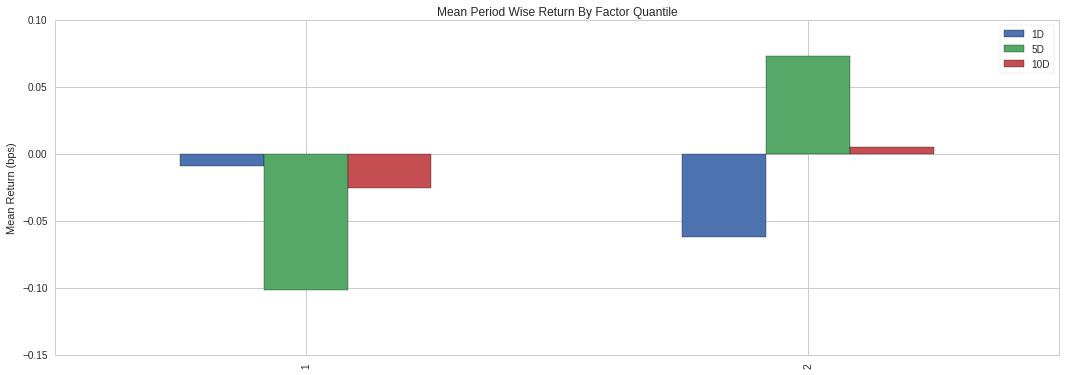

In [6]:
mean_return_by_q,std_err_by_q = al.performance.mean_return_by_quantile(factor_data)
al.plotting.plot_quantile_returns_bar(
                mean_return_by_q.apply(
                    al.utils.rate_of_return,
                    axis = 0,
                    args = ('1D',)
                )
            )

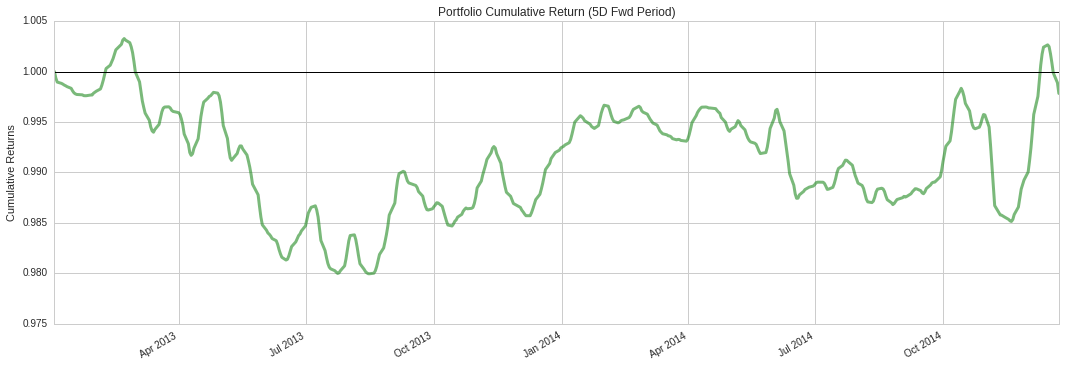

In [7]:
# Calculate factor-weighted long-short portfolio returns
ls_factor_returns = al.performance.factor_returns(factor_data)

# Plot cumulative returns for 5D holding period
al.plotting.plot_cumulative_returns(ls_factor_returns['5D'],'5D')

In [16]:
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.factors import SimpleMovingAverage

def make_pipeline():
    mean_close_10 = SimpleMovingAverage(
                    inputs = [USEquityPricing.close],
                    window_length = 10
                    )
    latest_close = USEquityPricing.close.latest
    return Pipeline(
                columns = {
                    '10D_mean_close': mean_close_10,
                    'latest_close'  : latest_close
                } 
            )  

In [20]:
result = run_pipeline(make_pipeline(), '2015-05-08', '2015-05-08')
result.head(10)

10D_mean_close  latest_close
2015-05-08 00:00:00+00:00 Equity(2 [ARNC])           13.631113        13.705
                          Equity(21 [AAME])           3.963750         3.960
                          Equity(24 [AAPL])         127.640168       125.250
                          Equity(25 [ARNC_PR])       88.362500        88.000
                          Equity(31 [ABAX])          58.971900        54.480
                          Equity(39 [DDC])           19.545430        19.450
                          Equity(41 [ARCB])          36.897000        37.050
                          Equity(52 [ABM])           32.154000        32.310
                          Equity(53 [ABMD])          67.842000        69.720
                          Equity(62 [ABT])           47.061500        46.505